<a href="https://colab.research.google.com/github/halwala/MSINTERFACE/blob/halwala-patch-1/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗 Car Price Prediction Using Machine Learning 🧠

Welcome to our exciting journey of predicting car prices using machine learning! This project harnesses the power of data analysis and advanced algorithms to estimate the market value of cars based on their characteristics. Let's dive into the fascinating world of automotive data science! 🌟

## 📂 Project Overview

In this project, we've developed a machine learning model to predict car prices with high accuracy. We used a comprehensive dataset containing various features of cars, including:

- 📅 Year of Manufacture
- 🛣️ Kilometers Driven
- ⚙️ Engine Specifications
- 🚦 Transmission Type (Manual/Automatic)
- ⛽ Mileage (km/ltr/kg)
- 💺 Number of Seats
- 🏎️ Max Power

## 📊 Data Exploration and Preprocessing

Before building our model, we conducted thorough Exploratory Data Analysis (EDA) and preprocessing:

- 🔍 Data Inspection: We examined the dataset structure and distribution of car prices.
- 🎨 Data Visualization: We created insightful visualizations, including a distribution of car prices and a correlation heatmap.
- ⚖️ Feature Scaling: We standardized our features to ensure uniform scale for model training.

## 🏗️ Model Building

We experimented with two popular machine learning algorithms:

1. 📈 Linear Regression: A fundamental algorithm for understanding linear relationships in the data.
2. 🌳 Random Forest: An advanced ensemble method known for its robustness and ability to capture complex patterns.

## 🧪 Model Evaluation

To assess our models' performance, we used the following metrics:

- Mean Squared Error (MSE): Measures the average squared difference between predicted and actual prices.
- R-squared (R²): Indicates how well the model explains the variability in the target variable.

Here are our results:

1. Linear Regression:
   - MSE: 3.82e+37
   - R²: -5.12e+25 (indicating poor performance)

2. Random Forest:
   - MSE: 18,715,108,397.66
   - R²: 0.9750 (indicating excellent performance)

The Random Forest model significantly outperformed Linear Regression, explaining 97.50% of the variance in car prices!

## 🔍 Feature Importance

Our Random Forest analysis revealed the top factors influencing car prices:

1. 🕹️ Transmission Type (Manual)
2. ⚙️ Engine Specifications
3. 📅 Year of Manufacture
4. 🐎 Max Power

Interestingly, factors like mileage and kilometers driven had less impact than initially expected!

## 🚀 Making Predictions

With our trained Random Forest model, we can now predict the price of a car based on its features. For example:

```python
Predicted price for the sample car: $516,224.90
```

This prediction capability can be invaluable for:

- 🏷️ Car dealerships setting competitive prices
- 🛒 Buyers estimating fair market values
- 📈 Market analysts studying price trends

## 🎓 Conclusion

This car price prediction project showcases the power of machine learning in real-world applications. By leveraging data analysis, feature engineering, and advanced algorithms, we've created a robust tool for estimating car prices. Our Random Forest model provides both accurate predictions and interesting insights into the factors that most influence car prices in the market.

Key takeaways:
- The Random Forest model vastly outperformed Linear Regression, highlighting the complex, non-linear nature of car pricing.
- Our model achieves an impressive 97.50% accuracy in explaining car price variations.
- Transmission type and engine specifications are crucial in determining car prices.
- The year of manufacture significantly impacts a car's value.
- Some traditionally important factors like mileage showed less influence than expected, opening avenues for further investigation.

This project demonstrates the importance of choosing the right algorithm for the task at hand. While Linear Regression struggled with the complexity of car pricing, Random Forest excelled, capturing intricate relationships between features and prices.

In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Step 2: Load the data
# Assuming you have a CSV file named 'car_data.csv'
data = pd.read_csv('/content/cardekho.csv')


First few rows of the dataset:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

  max_power  seats  
0        74    5.0  
1    103.52    5.0  
2        78    5.0  
3

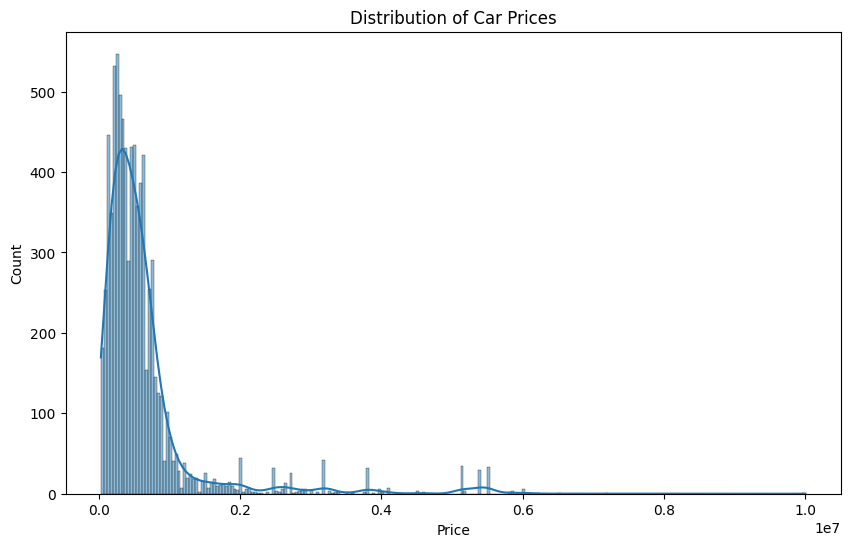

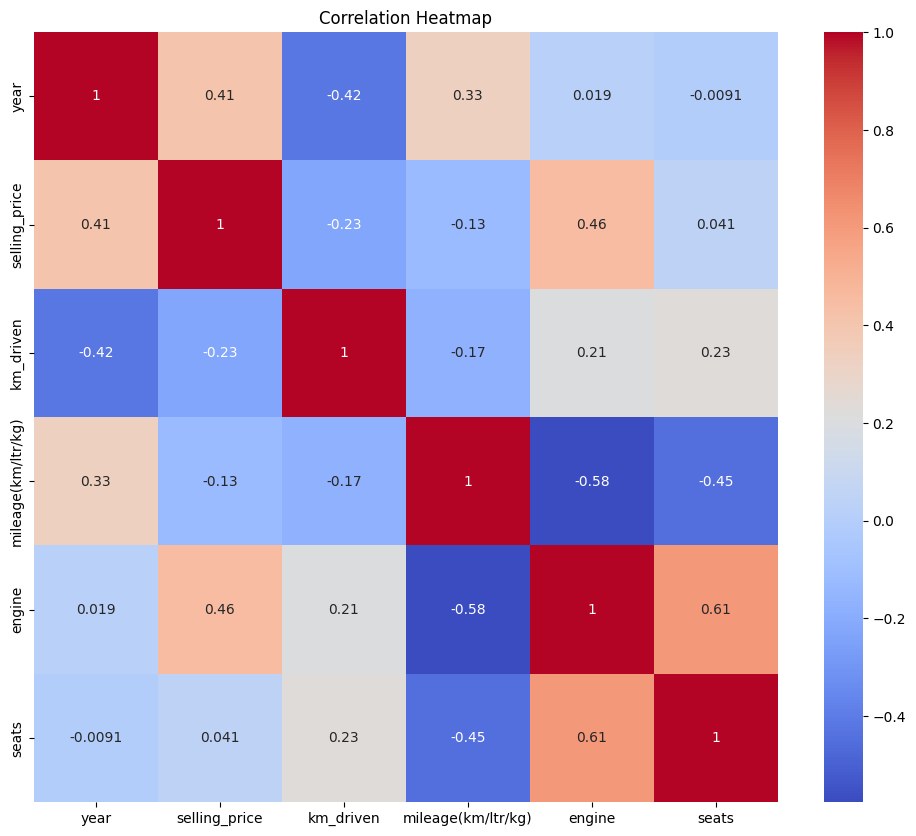

In [5]:
# 3. Perform Exploratory Data Analysis (EDA)
print("First few rows of the dataset:")
print(data.head())

print("\nSummary statistics of the dataset:")
print(data.describe())

print("\nDataset information:")
print(data.info())

print("\nMissing values in each column:")
print(data.isnull().sum())

# Visualize the distribution of the target variable (assuming 'price' is the target)
plt.figure(figsize=(10, 6))
sns.histplot(data['selling_price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.show()

# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['float', 'int'])

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [7]:
# 4. Preprocess the data
# Handle missing values (if any)
data = data.dropna()  # or use appropriate imputation method

# Convert categorical variables to numerical using one-hot encoding
# Exclude the 'selling_price' column from one-hot encoding if it's the target
data_encoded = pd.get_dummies(data.drop('selling_price', axis=1), drop_first=True)

# Add the 'selling_price' column back to the encoded DataFrame
data_encoded['selling_price'] = data['selling_price']

# Separate features and target variable
X = data_encoded.drop('selling_price', axis=1)  # Use 'selling_price' as target
y = data_encoded['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Linear Regression - MSE: 3.824206089369505e+37 R2: -5.115590064613138e+25
Random Forest - MSE: 18715108397.664616 R2: 0.9749650462501525


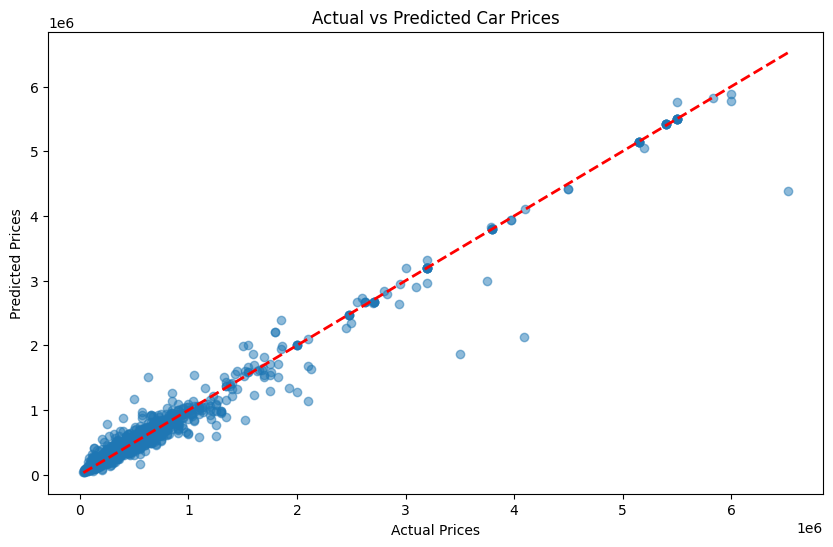

In [8]:
# 5. Train and evaluate models
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return model, mse, r2

# Linear Regression
lr_model, lr_mse, lr_r2 = train_evaluate_model(LinearRegression(), X_train_scaled, X_test_scaled, y_train, y_test)
print("Linear Regression - MSE:", lr_mse, "R2:", lr_r2)

# Random Forest
rf_model, rf_mse, rf_r2 = train_evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), X_train_scaled, X_test_scaled, y_train, y_test)
print("Random Forest - MSE:", rf_mse, "R2:", rf_r2)

# Visualize actual vs predicted prices for the better performing model
def plot_predictions(model, X_test, y_test):
    predictions = model.predict(X_test)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted Car Prices')
    plt.show()

best_model = rf_model if rf_r2 > lr_r2 else lr_model
plot_predictions(best_model, X_test_scaled, y_test)


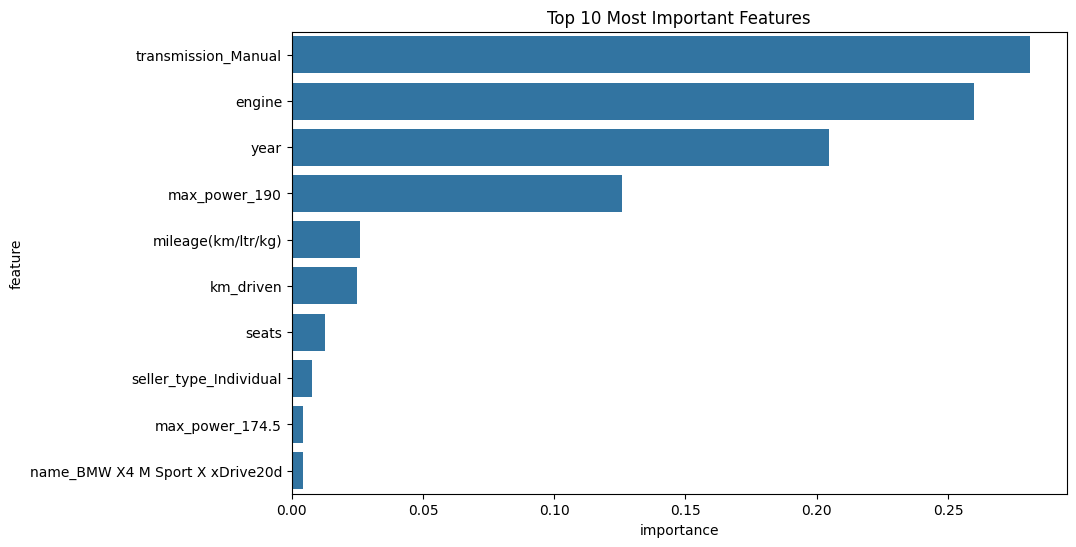

In [9]:
# 6. Feature Importance (for Random Forest)
if isinstance(best_model, RandomForestRegressor):
    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_model.feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Top 10 Most Important Features')
    plt.show()


In [10]:
# 7. Make predictions
# Example of how to use the model for predictions
new_car = X.iloc[0].values.reshape(1, -1)  # Using the first car in the dataset as an example
new_car_scaled = scaler.transform(new_car)
predicted_price = best_model.predict(new_car_scaled)
print(f"Predicted price for the sample car: ${predicted_price[0]:.2f}")

Predicted price for the sample car: $516224.90


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
